# **Dataset do Projeto**


## **Pesquisa Nacional por Amostra de Domicílios COVID-19 - Setembro 2020**

---

Objetiva estimar o número de pessoas com sintomas referidos associados à síndrome gripal e monitorar os impactos da pandemia da COVID-19 no mercado de trabalho brasileiro.

---

**A coleta da Pesquisa Nacional por Amostra de Domicílios - PNAD COVID19** teve início em 4 de maio de 2020, com entrevistas realizadas por telefone em, aproximadamente, 48 mil domicílios por semana, totalizando cerca de 193 mil domicílios por mês, em todo o Território Nacional. A amostra é fixa, ou seja, os domicílios entrevistados no primeiro mês de coleta de dados permanecerão na amostra nos meses subsequentes, até o fim da pesquisa.

# **Análises Estatísticas**



### Bibliotecas, dataset e dicionarios

In [52]:
import pandas as pd
import seaborn as sns
import numpy as np

In [109]:
dicionario_codigo_uf = {35: "São Paulo", 31: "Minas Gerais", 43: "Rio Grande do Sul", 29: "Bahia",
                        33: "Rio de Janeiro", 15: "Pará", 41: "Paraná", 26: "Pernambuco", 52: "Goiás",
                        23: "Ceará", 42: "Santa Catarina", 13: "Amazonas", 53: "Distrito Federal", 51: "Mato Grosso",
                        21: "Maranhão", 11: "Rondônia", 32: "Espirito Santo", 50: "Mato Grosso do Sul", 17: "Tocantins",
                        28: "Sergipe", 25: "Paraíba", 22: "Piauí", 24: "Rio Grande do Norte", 12: "Acre",
                        27: "Alagoas", 14: "Roraima", 16: "Amapá"}

dicionario_cor = {1: 'Branca',
                  2: 'Preta',
                  3: 'Amarela',
                  4: 'Parda',
                  5: 'Indígena',
                  9: 'Ignorado'}

dicionario_sexo = {1: 'Homem',
                   2: 'Mulher'}

dicionario_febre = {1: 'Sim',
                    2: 'Não',
                    3: 'Não Sabe'}

dicionario_respostas = {1: 'Positivo', 2: 'Negativo', 3: 'Inconclusivo', 4: 'Ainda Não Recebeu Resultado', 9: 'Ingnorado'}

In [56]:
dados = pd.read_csv('PNAD_COVID_112020.csv')

### **Frequência da Aparição dos Estados**

In [ ]:
frequencia_uf = pd.value_counts(dados.UF)
frequencia_uf

In [ ]:
percentual = pd.value_counts(dados.UF, normalize= True)*100
percentual

In [59]:
distribuicao_de_frequencia_uf = pd.DataFrame({'Frequência': frequencia_uf, 'Porcentagem (%)': percentual})
distribuicao_de_frequencia_uf.rename_axis('UF', axis= 'columns', inplace= True)
distribuicao_de_frequencia_uf.rename(dicionario_codigo_uf, inplace= True)
distribuicao_de_frequencia_uf

UF,Frequência,Porcentagem (%)
Minas Gerais,34339,9.002512
São Paulo,32104,8.416571
Rio de Janeiro,29065,7.619849
Santa Catarina,23432,6.143069
Rio Grande do Sul,21931,5.749558
Maranhão,20404,5.349231
Paraná,19872,5.209759
Pernambuco,17138,4.492998
Bahia,17063,4.473335
Ceará,16182,4.242367


### Gráfico da Frequência de Aparição dos Estados




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


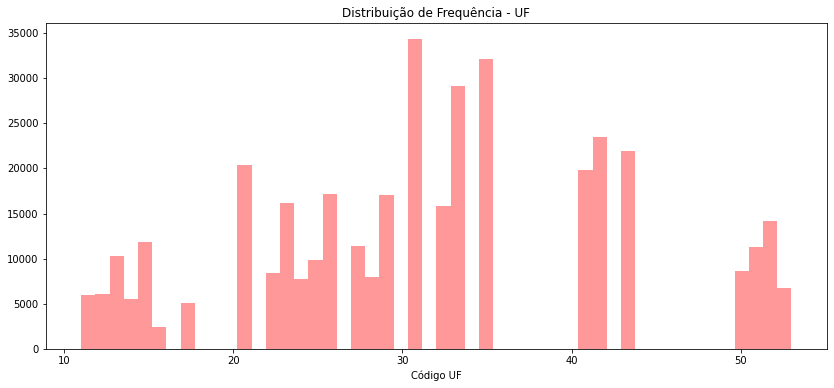

In [60]:
ax = sns.distplot(dados.UF, kde= False, color= 'red')
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de Frequência - UF')
ax.set_xlabel('Código UF')
ax

### Análise das Respostas do Teste de COVID

In [ ]:
casos_por_estado_freq = dados['B009B'].value_counts()
casos_por_estado_freq

In [ ]:
casos_por_estado_perc = dados['B009B'].value_counts(normalize=True)*100
casos_por_estado_perc

In [64]:
distribuicao_respostas = pd.DataFrame({'Frequência': casos_por_estado_freq, 'Porcentagem(%)': casos_por_estado_perc})
distribuicao_respostas.rename(dicionario_respostas, inplace= True)
distribuicao_respostas

,Frequência,Porcentagem(%)
Negativo,13564,67.630634
Positivo,5789,28.864180
Ainda Não Recebeu Resultado,594,2.961707
Inconclusivo,104,0.518548
Ingnorado,5,0.024930


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


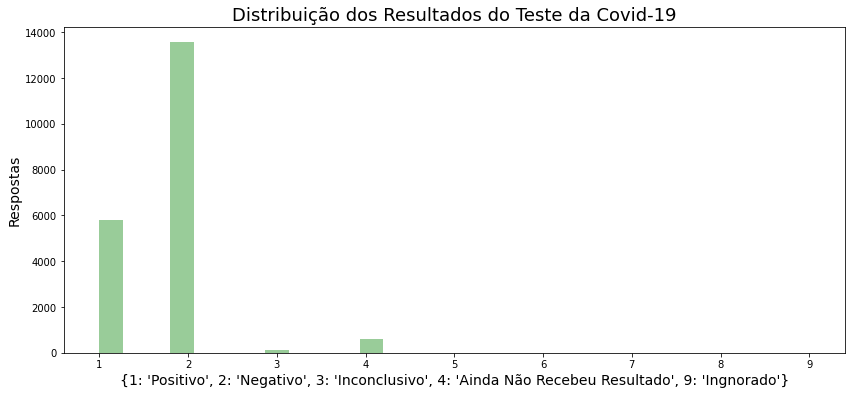

In [65]:
ax = sns.distplot(dados['B009B'], kde= False, bins= 30, color= 'g')
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição dos Resultados do Teste da Covid-19', fontsize= 18)
ax.set_xlabel(dicionario_respostas, fontsize= 14)
ax.set_ylabel('Respostas', fontsize= 14)
ax

**Idade dos Infectados**

In [130]:
afetados_por_idade = pd.crosstab(index= dados.B009B, columns= dados.A002,)
afetados_por_idade.drop(labels= 9, inplace=True)
afetados_por_idade.drop(labels= 4, inplace=True)
afetados_por_idade.drop(labels= 3, inplace=True)
afetados_por_idade.rename(dicionario_respostas, inplace=True)
afetados_por_idade.rename_axis('Idade', axis= 'columns', inplace=True)
afetados_por_idade.rename_axis('Resultado', axis= 0, inplace=True)
afetados_por_idade


Idade,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,98,99,101,102,105,111
Resultado,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Positivo,9,14,26,13,15,19,11,19,21,22,21,24,23,35,40,34,36,41,37,64,77,65,76,95,109,124,108,109,97,100,125,124,134,150,134,133,137,135,128,154,...,45,61,51,31,49,39,34,40,28,20,32,21,12,21,8,10,13,15,11,8,5,8,5,7,8,4,4,9,1,1,2,0,2,0,0,1,0,0,0,0
Negativo,21,61,55,59,54,47,56,54,58,77,77,65,66,71,82,79,133,143,157,170,216,231,213,247,268,243,228,264,263,234,219,286,299,263,252,288,293,330,309,320,...,134,134,125,111,114,111,82,75,68,83,78,42,48,60,49,46,38,37,24,33,35,28,24,16,10,7,16,11,11,7,5,5,3,4,1,1,1,0,1,1


### Resultado do Teste - SP

In [ ]:
numero_de_respostas = dados.groupby('UF')['B009B'].value_counts()
numero_de_respostas

In [ ]:
percentual = dados.groupby('UF')['B009B'].value_counts(normalize= True)*100
percentual

In [ ]:
distribuicao_respostas = pd.DataFrame({'Frequência': numero_de_respostas, 'Porcentagem (%)': percentual})
distribuicao_respostas.rename(dicionario_codigo_uf, inplace= True)
distribuicao_respostas.rename(dicionario_respostas, inplace= True)
distribuicao_respostas

In [69]:
distribuicao_sp = distribuicao_respostas.filter(like= 'São Paulo', axis= 0)
distribuicao_sp

Frequência  Porcentagem (%)
UF        B009B                                                   
São Paulo Negativo                           1807        73.694943
          Positivo                            567        23.123980
          Ainda Não Recebeu Resultado          63         2.569331
          Inconclusivo                         15         0.611746

### Frequência de Respostas com base no Sexo e Cor

In [75]:
frequencia = dados.A003.value_counts()

In [76]:
percentual = dados.A003.value_counts(normalize= True)*100

In [72]:
dist_frequencia = pd.DataFrame({'Frequência': frequencia, 'Porcentagem': percentual})
dist_frequencia.rename_axis('Sexo', axis= 1, inplace= True)
dist_frequencia.rename(dicionario_sexo, inplace= True)
dist_frequencia

Sexo,Frequência,Porcentagem
Mulher,198827,52.12564
Homem,182611,47.87436


In [73]:
dist_frequencia = pd.crosstab(dados.A003, dados.A004)
dist_frequencia.rename(index= dicionario_sexo, inplace=True)
dist_frequencia.rename(columns= dicionario_cor, inplace=True)
dist_frequencia

A004,Branca,Preta,Amarela,Parda,Indígena,Ignorado
A003,,,,,,
Homem,74657,15544,1038,90647,685,40
Mulher,84599,15860,1202,96307,803,56


In [77]:
dist_percentual = pd.crosstab(dados.A003, dados.A004, normalize=True)*100
dist_percentual.rename(index= dicionario_sexo, inplace=True)
dist_percentual.rename(columns= dicionario_cor, inplace=True)

### Porcentagem de Pessoas com Sintomas da Covid

Febre

In [94]:
respostas  = dados.B0011.value_counts()
percentual = dados.B0011.value_counts(normalize=True)*100
percentual = round(percentual, 2)

df = pd.DataFrame({'Respostas': respostas, 'Porcentagem (%)': percentual})
df.rename(dicionario_febre, inplace=True)
df.rename_axis('Teve Febre?', axis= 'columns', inplace=True)
df.drop(labels= 9)

Teve Febre?,Respostas,Porcentagem (%)
Não,377080,98.86
Sim,3168,0.83
Não Sabe,206,0.05


**Tosse**

In [93]:
respostas  = dados.B0012.value_counts()
percentual = dados.B0012.value_counts(normalize=True)*100
percentual = round(percentual, 2)

df = pd.DataFrame({'Respostas': respostas, 'Porcentagem (%)': percentual})
df.rename(dicionario_febre, inplace=True)
df.rename_axis('Teve Tosse?', axis= 'columns', inplace=True)
df.drop(labels= 9)

Teve Tosse?,Respostas,Porcentagem (%)
Não,374980,98.31
Sim,5259,1.38
Não Sabe,211,0.06


**Dificuldade para Respirar**

In [92]:
respostas  = dados.B0014.value_counts()
percentual = dados.B0014.value_counts(normalize=True)*100
percentual = round(percentual, 2)

df = pd.DataFrame({'Respostas': respostas, 'Porcentagem (%)': percentual})
df.rename(dicionario_febre, inplace=True)
df.rename_axis('Teve dificuldade para respirar?', axis= 'columns', inplace=True)
df.drop(labels= 9)

Teve dificuldade para respirar?,Respostas,Porcentagem (%)
Não,378697,99.28
Sim,1538,0.40
Não Sabe,214,0.06


**Perda de Paladar/Olfato**

In [108]:
respostas  = dados.B00111.value_counts()
percentual = dados.B00111.value_counts(normalize=True)*100
percentual = round(percentual, 2)

df = pd.DataFrame({'Respostas': respostas, 'Porcentagem (%)': percentual})
df.rename(dicionario_febre, inplace=True)
df.rename_axis('Teve perda de paladar e/ou olfato?', axis= 'columns', inplace=True)
df.drop(labels= 9)

Teve perda de paladar e/ou olfato?,Respostas,Porcentagem (%)
Não,378388,99.20
Sim,1467,0.38
Não Sabe,223,0.06


### Das pessoas que buscaram atendimento, quantas recorreram a um hospital do  SUS?

In [97]:
respostas = dados.B0043.value_counts()
percentual = dados.B0043.value_counts(normalize=True)*100
percentual = round(percentual, 2)

df = pd.DataFrame({'Frequência': respostas, 'Porcentagem': percentual})
df. rename({1: 'SUS', 2: 'Outros'}, inplace=True)
df.drop(labels= 9, inplace=True)
df

,Frequência,Porcentagem
Outros,3308,82.10
SUS,688,17.08


**Sexo das pessoas que preferiram o SUS**

In [107]:
foram_ao_sus = pd.crosstab(dados.A003, dados.B0043)
foram_ao_sus.drop(columns= 9, inplace=True)
foram_ao_sus.rename(index= dicionario_sexo, inplace=True)
foram_ao_sus.rename(columns= {1: 'SUS', 2: 'Outros'}, inplace=True)
foram_ao_sus.rename_axis('Hospital', axis= 'columns', inplace=True)
foram_ao_sus.rename_axis('Sexo', axis= 0, inplace=True)
foram_ao_sus

Hospital,SUS,Outros
Sexo,,
Homem,291,1366
Mulher,397,1942
